# Tipos de datos: Contadores

Este notebook presenta un caso donde se cliente almacenar contadores

In [49]:
import riak

client = riak.RiakClient()

## Inicialiación del contador

Vamos a ver como sería tener un contador en un bucket de riak

In [94]:
initValue = 0

bucket = client.bucket("bucket_name")
bucket.new("contador", initValue).store()
bucket.get("contador").data

0

## Incremento

En un caso inical un cliente incrementa el contador. Fíjaté que será necesario obtener el valor actual antes de poder incrementarlo

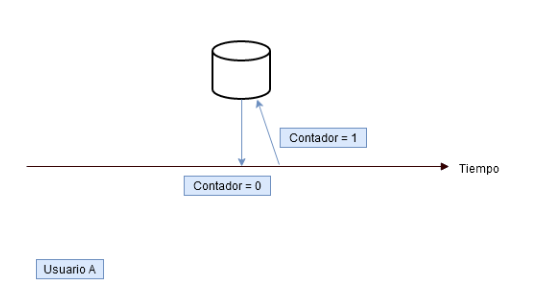

In [70]:
CurrentValue = bucket.get("contador").data
print(CurrentValue)

0


In [71]:
bucket.new("contador", CurrentValue + 1).store()
bucket.get("contador").data

1

Perfecto!

## Incremento por 2 cliente de forma simultanea

Vamos a ver que ocurre cuando 2 clientes intentan actualizar el contador simultaneamente

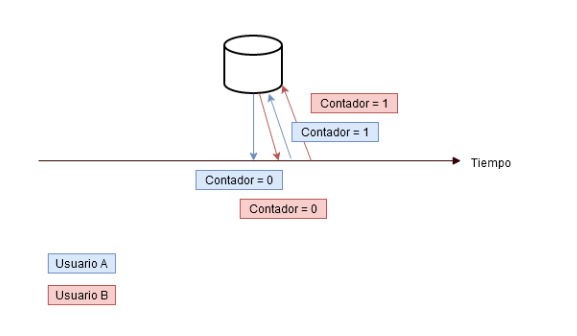

In [72]:
# Initialize the Counter
initValue = 0

bucket = client.bucket("bucket_name")
bucket.new("contador", initValue).store()
bucket.get("contador").data

0

In [59]:
client1 = riak.RiakClient()
bucket1 = client1.bucket("bucket_name")

CurrentValue_Client1 = bucket1.get("contador").data
print(CurrentValue_Client1)

0


In [60]:
client2 = riak.RiakClient()
bucket2 = client2.bucket("bucket_name")

CurrentValue_Client2 = bucket2.get("contador").data
print(CurrentValue_Client2)

0


In [61]:
bucket1.new("contador", CurrentValue_Client1 + 1).store()
bucket1.get("contador").data

1

In [62]:
bucket2.new("contador", CurrentValue_Client2 + 1).store()
bucket2.get("contador").data

1

El contador se ha actualizado erróneamente

## Bucket de tipo Counter

Riak tiene funcionalidad para resolver estos casos complejos de concurrencia: Un bucket de tipo contador

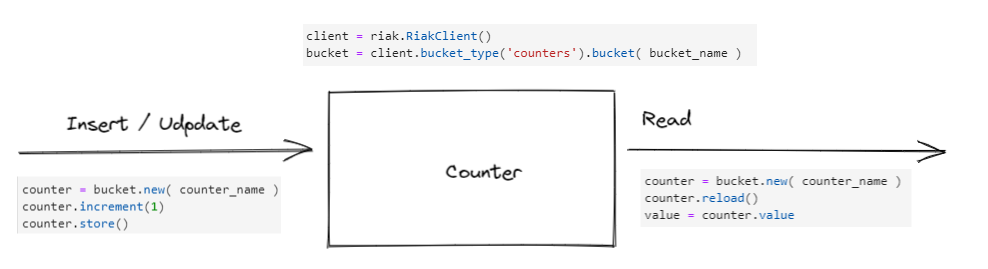

In [73]:
bucket = client.bucket_type('counters').bucket('bucket_counter')
counter = bucket.new('contador')

## Incremento de un contador

Una vez creado el contador, podemos incrementarlo. El valor inicial es siempre 0. 

Observa que no será necesario obtener el valor actual antes de incrementarlo

In [93]:
counter.increment(1)
counter.store()

## Recuperar el valor de un contador

Para obtener el valor actual necesitaremos llamar al método "reload" para obtener el último valor de la base de datos

In [92]:
counter = bucket.new('contador')
counter.reload()

print("Value:", counter.value)

Value: 4
